In [27]:
import quimb as qu
import quimb.tensor as qtn
import itertools
import pickle
import numpy as np
import netket as nk
import matplotlib.pyplot as plt
import scipy
import scipy.sparse.linalg
import scipy.linalg
import scipy.sparse
from twoD_tool import *

L = 4
mean_ = [0.0, 0.02, 0.05, 0.1, 0.2]
bond_dim_ = [2, 5, 10]
dtype = "float64"   #dtype of the peps, float64 or complex128
iter = 5
cmi = []
mean_corr = []
var_corr = []
cmi_all = {}
for i in range(L*(L-2)):
    cmi_all[i] = []
for mean in mean_:
    for bond_dim in bond_dim_:
        for i in range(iter):
            peps = qtn.PEPS.rand(Lx = L, Ly = L, dtype=dtype, bond_dim=bond_dim, seed=2)
            for tensor in peps.tensors:
                data = tensor.data
                data += mean
            prob = peps.contract(all, optimize='auto-hq')
            prob_exact = np.real(prob.data.conj()*prob.data)
            norm = prob_exact.sum()
            prob_exact = prob_exact/norm
            mean_corr_, var_corr_ = correlation_all(prob_exact, L)
            mean_corr.append(mean_corr_)
            var_corr.append(var_corr_)
            cmi.append(cmi_(prob_exact, L))
            cmi_traceout_ = cmi_traceout(prob_exact, L)
            for j in range(L*(L-2)):
                cmi_all[j].append(cmi_traceout_[j])


cmi = np.reshape(cmi, (len(mean_), len(bond_dim_), iter, -1))
mean_corr = np.reshape(mean_corr, (len(mean_), len(bond_dim_), iter, -1))
var_corr = np.reshape(var_corr, (len(mean_), len(bond_dim_), iter, -1))
for i in cmi_all:
    cmi_all[i] = np.reshape(cmi_all[i], (len(mean_), len(bond_dim_), iter, -1))

np.save("result/random_peps/cmi_random_peps_L"+str(L)+"_mean_"+",".join(str(item) for item in mean_)+"_bond_dim_"+",".join(str(item) for item in bond_dim_)+"_iter="+str(iter)+"_dtype="+str(dtype)+".npy", np.array(cmi))
np.save("result/random_peps/mean_corr_random_peps_L"+str(L)+"_mean_"+",".join(str(item) for item in mean_)+"_bond_dim_"+",".join(str(item) for item in bond_dim_)+"_iter="+str(iter)+"_dtype="+str(dtype)+".npy", np.array(mean_corr))
np.save("result/random_peps/var_corr_random_peps_L"+str(L)+"_mean_"+",".join(str(item) for item in mean_)+"_bond_dim_"+",".join(str(item) for item in bond_dim_)+"_iter="+str(iter)+"_dtype="+str(dtype)+".npy", np.array(var_corr))
with open('result/random_peps/traceout/cmi_all_L'+str(L)+"_mean_"+",".join(str(item) for item in mean_)+"_bond_dim_"+",".join(str(item) for item in bond_dim_)+"_iter="+str(iter)+"_dtype="+str(dtype)+'.pkl', 'wb') as pickle_file:
    pickle.dump(cmi_all, pickle_file)

In [26]:
print(cmi.shape)
print(mean_corr.shape)
print(cmi_all[3].shape)
",".join(str(item) for item in mean_)

(5, 3, 5, 6)
(5, 3, 5, 7)
(5, 3, 5, 6)


'0.0,0.02,0.05,0.1,0.2'

In [3]:

cmi = np.load("result/random_peps/cmi_random_peps_L"+str(L)+"_mean_"+",".join(str(item) for item in mean_)+"_bond_dim_"+",".join(str(item) for item in bond_dim_)+"_iter="+str(iter)+"_dtype="+str(dtype)+".npy")
mean_corr = np.load("result/random_peps/mean_corr_random_peps_L"+str(L)+"_mean_"+",".join(str(item) for item in mean_)+"_bond_dim_"+",".join(str(item) for item in bond_dim_)+"_iter="+str(iter)+"_dtype="+str(dtype)+".npy")
var_corr = np.load("result/random_peps/var_corr_random_peps_L"+str(L)+"_mean_"+",".join(str(item) for item in mean_)+"_bond_dim_"+",".join(str(item) for item in bond_dim_)+"_iter="+str(iter)+"_dtype="+str(dtype)+".npy")



for m in mean_:
    for b in bond_dim_:
        filename = f"result/random_peps/cmi_random_peps_L{L}_mean_{m}_bond_dim_{b}_iter={iter}_dtype={dtype}.npy"
        cmi[m, b] = np.load(filename)
        filename = f"result/random_peps/mean_corr_random_peps_L{L}_mean_{m}_bond_dim_{b}_iter={iter}_dtype={dtype}.npy"
        mean_corr[m, b] = np.load(filename)
        mean_corr[m, b] = np.abs(mean_corr[m, b])
        filename = f"result/random_peps/var_corr_random_peps_L{L}_mean_{m}_bond_dim_{b}_iter={iter}_dtype={dtype}.npy"
        var_corr[m, b] = np.load(filename)
        filename = f"result/random_peps/cmi_traceout_random_peps_L{L}_mean_{m}_bond_dim_{b}_iter={iter}_dtype={dtype}.npy"
        cmi_traceout[m, b] = np.load(filename, allow_pickle=True)


In [4]:
cmi

{(0.0,
  2): array([0.23342043, 0.14131805, 0.08328645, 0.04869074, 0.02447239,
        0.00703617]),
 (0.0,
  5): array([0.30056054, 0.29692794, 0.29161505, 0.27777659, 0.22161346,
        0.09558142]),
 (0.0,
  10): array([0.30398958, 0.30348343, 0.30279582, 0.29544439, 0.24298749,
        0.10825696]),
 (0.02,
  2): array([0.22382494, 0.14137241, 0.07709772, 0.04518981, 0.02170002,
        0.00654018]),
 (0.02,
  5): array([0.30261215, 0.29928592, 0.29354533, 0.27982611, 0.22521924,
        0.09783378]),
 (0.02,
  10): array([0.03314476, 0.02877718, 0.01591452, 0.00863335, 0.00523628,
        0.00273009]),
 (0.05,
  2): array([0.20427506, 0.14119417, 0.06705896, 0.04069547, 0.01794077,
        0.00566709]),
 (0.05,
  5): array([0.25374184, 0.23704104, 0.22330855, 0.19210623, 0.14868978,
        0.07125051]),
 (0.05,
  10): array([7.50080066e-04, 1.35044757e-04, 1.57341728e-05, 9.13192121e-07,
        5.73505989e-08, 1.80412982e-08]),
 (0.1,
  2): array([0.16555014, 0.13353786, 0.054

In [38]:
cmi_length = []
err_cmi_length =[]
corre_length = []
err_corre_length = []
cmi_length_traceout = [[[] for j in  range (len(bond_dim_))]for i in range (len(mean_)) ]
err_cmi_length_traceout = [[[] for j in  range (len(bond_dim_)) ]for i in range (len(mean_))]

for i in mean_:
    for b in bond_dim_:
        df = len(cmi[i, b])-2
        (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i, b])), -np.log(cmi[i, b]), 1, full=True)
        mean_x = np.mean(np.arange(len(cmi[i ,b])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi[i, b])) - mean_x)**2))
        cmi_length.append(cmi_len)
        err_cmi_length.append(err)

        (corr_len, b2), residuals, _, _, _ = np.polyfit(np.arange(len(mean_corr[i, b])), -np.log(mean_corr[i, b]), 1, full=True)
        mean_x = np.mean(np.arange(len(mean_corr[i, b])))
        err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(mean_corr[i, b])) - mean_x)**2))
        corre_length.append(corr_len)
        err_corre_length.append(err)

        for j in range(len(cmi_traceout[i, b])):
            df = len(cmi_traceout[i, b][j])-2
            (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)
            mean_x = np.mean(np.arange(len(cmi_traceout[i, b][j])))
            err = np.sqrt(residuals / df) / np.sqrt(np.sum((np.arange(len(cmi_traceout[i, b][j])) - mean_x)**2))
            cmi_length_traceout[mean_.index(i)][bond_dim_.index(b)].append(cmi_len)
            err_cmi_length_traceout[mean_.index(i)][bond_dim_.index(b)].append(err)



C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\932940918.py:11: RuntimeWarning: invalid value encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi[i, b])), -np.log(cmi[i, b]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\932940918.py:25: RuntimeWarning: invalid value encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\932940918.py:25: RuntimeWarning: divide by zero encountered in log
  (cmi_len, b1), residuals, _, _, _ = np.polyfit(np.arange(len(cmi_traceout[i, b][j])), -np.log(cmi_traceout[i, b][j]), 1, full=True)


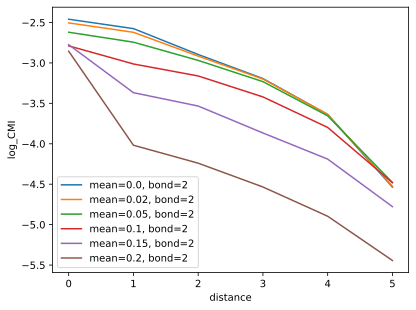

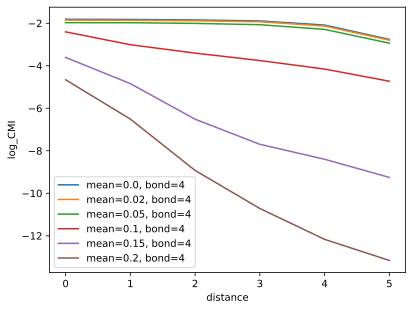

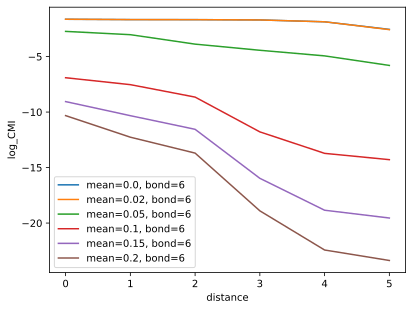

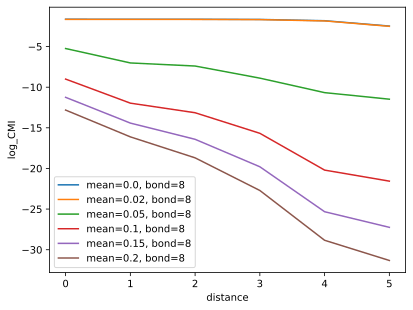

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\2082502314.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))


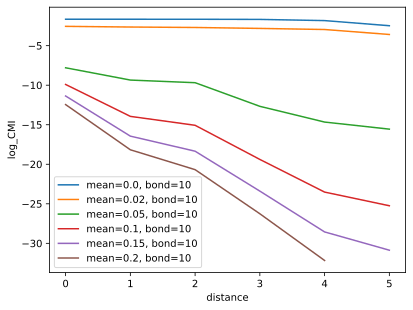

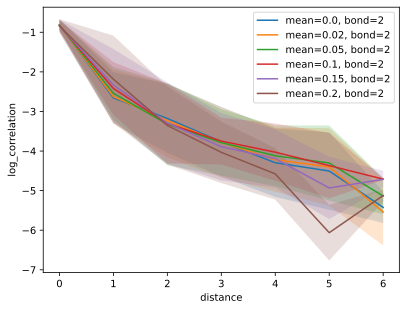

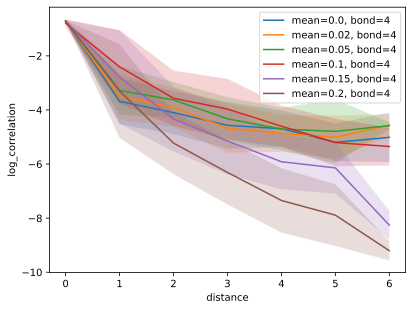

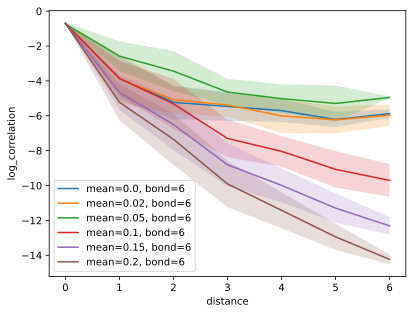

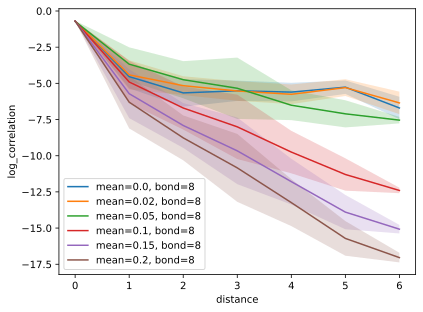

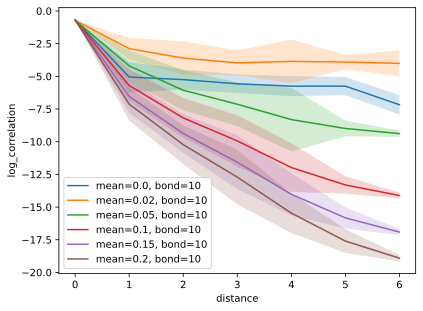

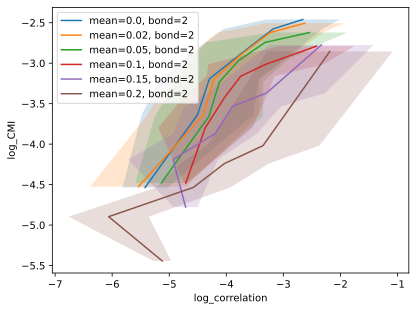

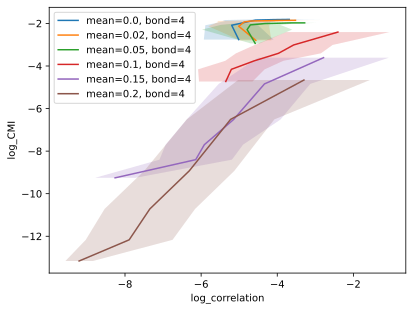

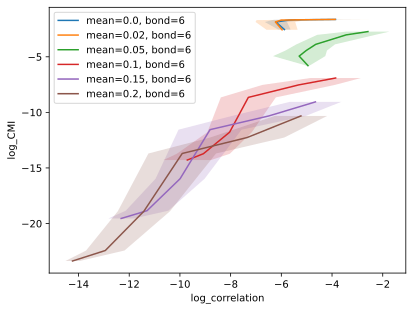

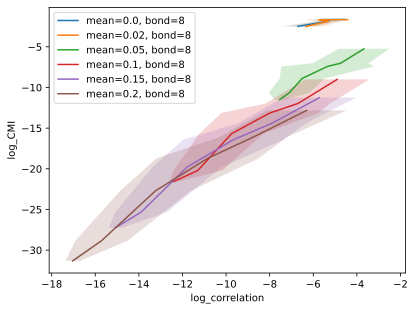

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\2082502314.py:24: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\2082502314.py:25: RuntimeWarning: invalid value encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)


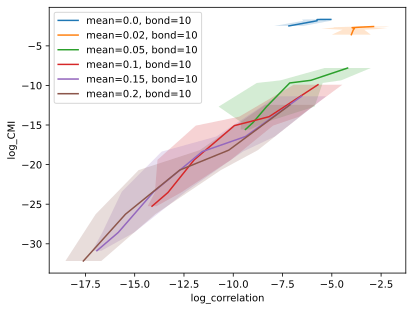

<Figure size 640x480 with 0 Axes>

In [40]:
for j in bond_dim_:
    for i in mean_:
        plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
    plt.xlabel("distance")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/cmi_random_peps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for j in bond_dim_:
    for i in mean_:
        plt.plot(np.arange(len(mean_corr[i, j])), np.log(mean_corr[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_between(np.arange(len(mean_corr[i, j])) ,np.log(mean_corr[i, j]) - 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]) , np.log(mean_corr[i, j]) + 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]), alpha=0.2)
    plt.xlabel("distance")
    plt.ylabel("log_correlation")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_random_peps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for j in bond_dim_:
    for i in mean_:
        plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
    plt.xlabel("log_correlation")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_cmi_random_peps_L"+str(L)+"_bond_dim="+str(j)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()



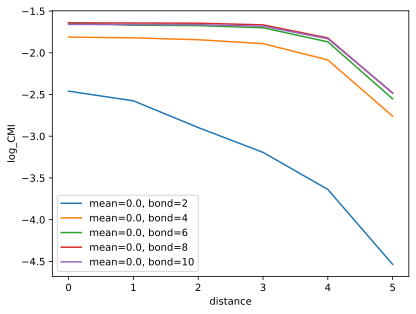

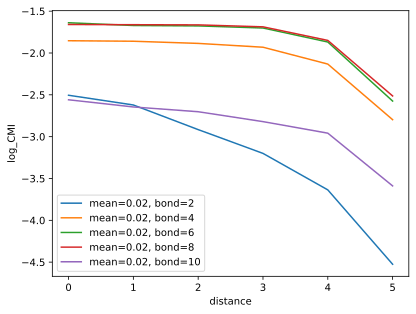

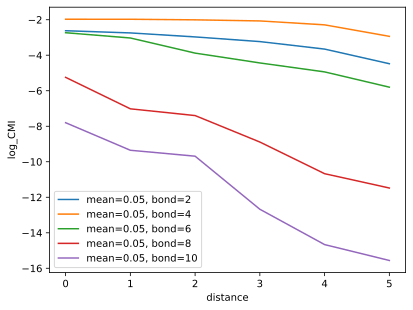

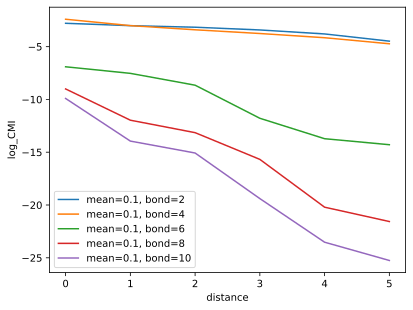

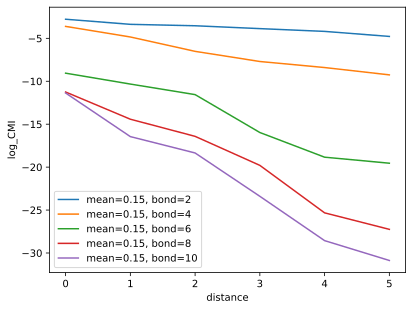

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\3402856512.py:3: RuntimeWarning: invalid value encountered in log
  plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))


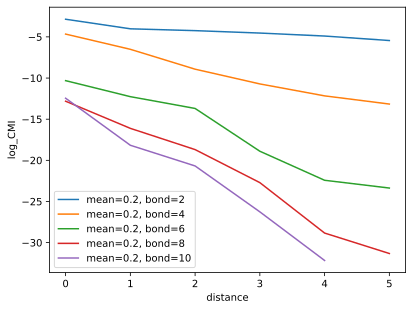

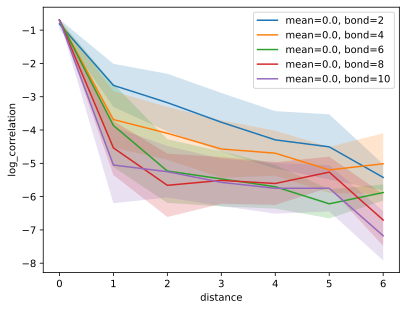

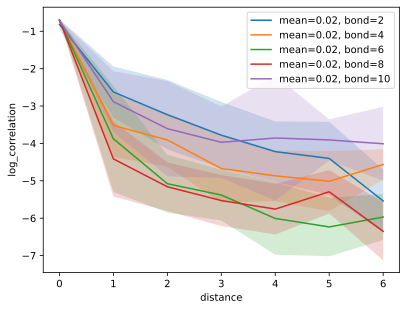

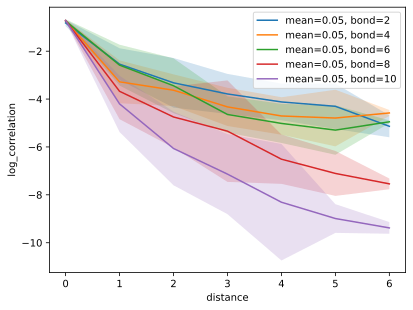

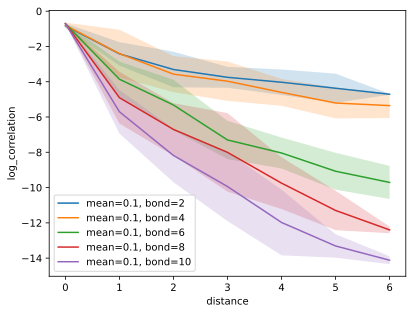

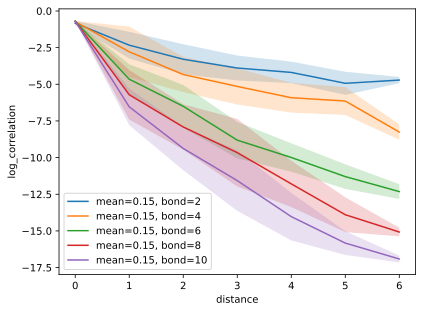

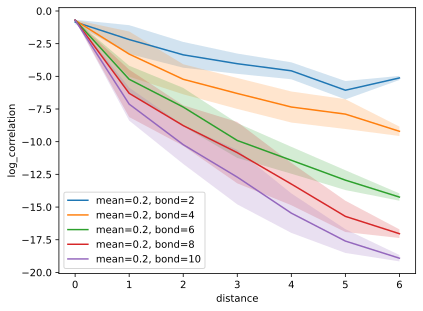

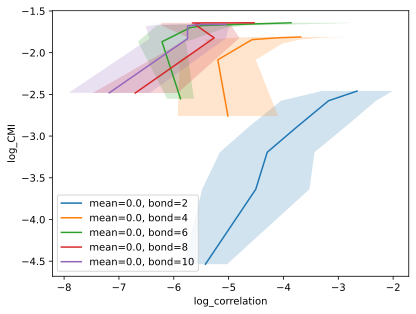

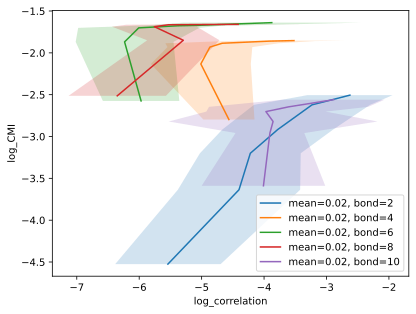

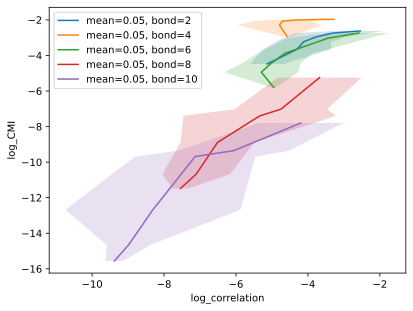

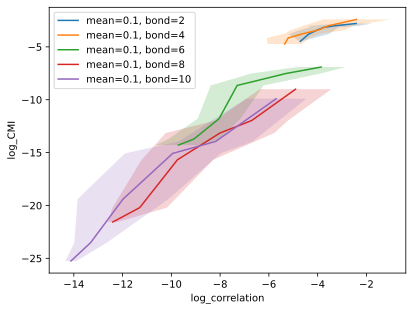

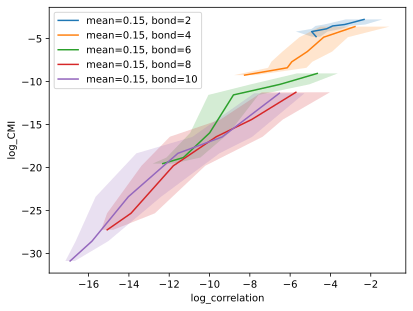

C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\3402856512.py:24: RuntimeWarning: invalid value encountered in log
  plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_8384\3402856512.py:25: RuntimeWarning: invalid value encountered in log
  plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)


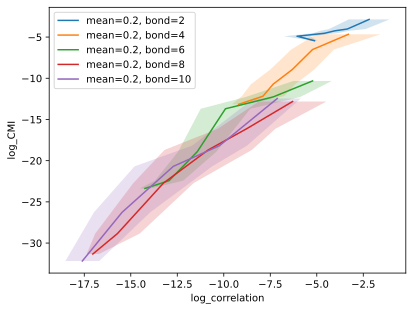

<Figure size 640x480 with 0 Axes>

In [42]:
for i in mean_:
    for j in bond_dim_:
        plt.plot(np.arange(len(cmi[i, j])), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
    plt.xlabel("distance")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/cmi_random_peps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for i in mean_:
    for j in bond_dim_:
        plt.plot(np.arange(len(mean_corr[i, j])), np.log(mean_corr[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_between(np.arange(len(mean_corr[i, j])) ,np.log(mean_corr[i, j]) - 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]) , np.log(mean_corr[i, j]) + 1/mean_corr[i, j]*np.sqrt(var_corr[i, j]), alpha=0.2)
    plt.xlabel("distance")
    plt.ylabel("log_correlation")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_random_peps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

for i in mean_:
    for j in bond_dim_:
        plt.plot(np.log(mean_corr[i, j][1:]), np.log(cmi[i, j]), label="mean="+str(i)+", bond="+str(j))
        plt.fill_betweenx(np.log(cmi[i, j]), np.log(mean_corr[i, j][1:]) - 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]) , np.log(mean_corr[i, j][1:]) + 1/mean_corr[i, j][1:]*np.sqrt(var_corr[i, j][1:]), alpha=0.2)
    plt.xlabel("log_correlation")
    plt.ylabel("log_CMI")
    plt.legend()
    plt.savefig("figure/random_peps/correlation_cmi_random_peps_L"+str(L)+"_mean="+str(i)+"_dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()



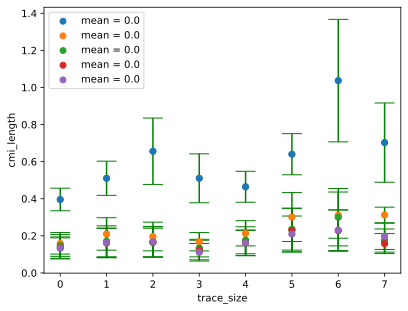

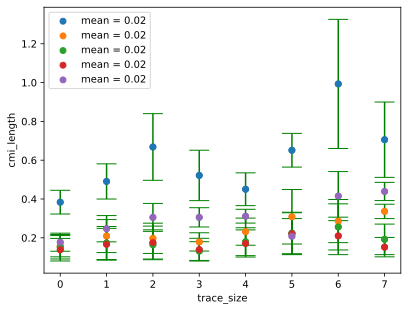

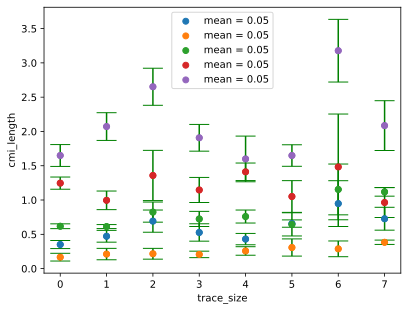

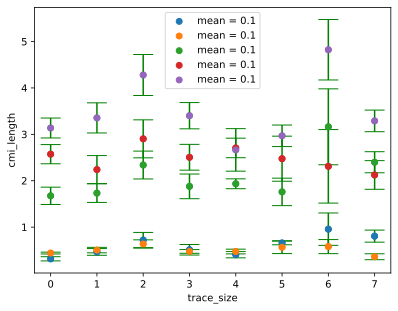

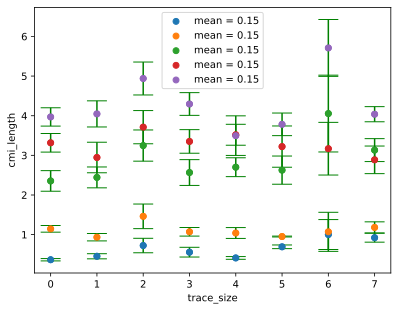

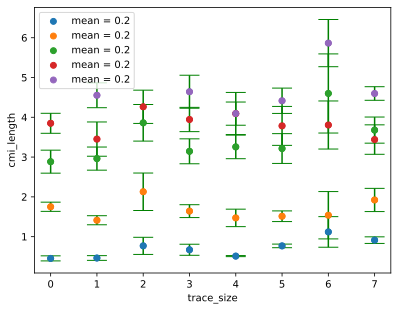

<Figure size 640x480 with 0 Axes>

In [29]:
for i in range(len(mean_)):
    for j in range(len(bond_dim_)):
        plt.scatter(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], label="mean = "+str(mean_[i]) + ", bond = "+str(bond_dim_[j]))
        plt.errorbar(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], yerr=np.array(err_cmi_length_traceout[i][j]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig("figure/random_peps/traceout/cmi_length_traceout_random_peps_L"+str(L)+"mean="+str(i)+"dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()

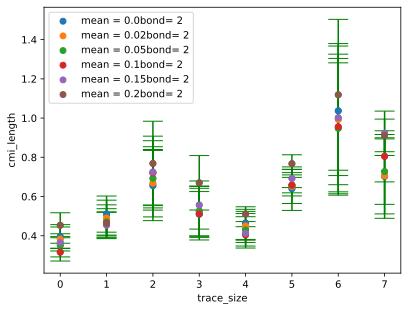

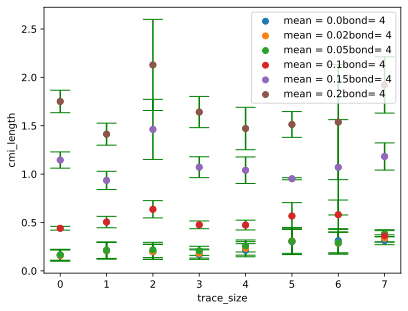

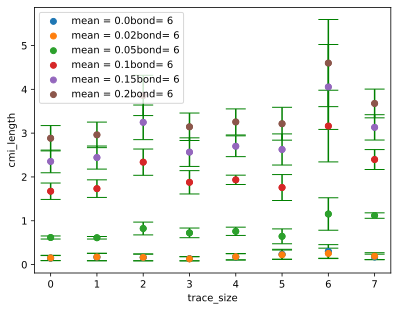

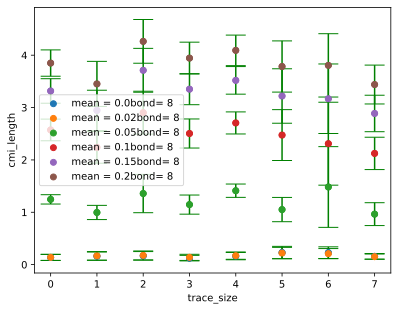

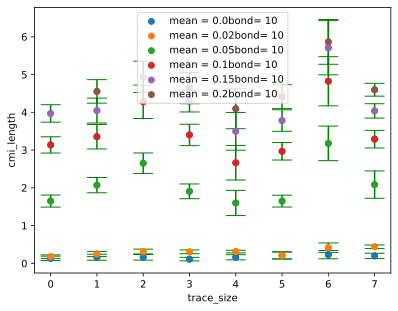

<Figure size 640x480 with 0 Axes>

In [44]:
for j in range(len(bond_dim_)):
    for i in range(len(mean_)):
        plt.scatter(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], label= "mean = "+str(mean_[i])+", bond= "+str(bond_dim_[j]))
        plt.errorbar(np.arange(len(cmi_length_traceout[i][j])), cmi_length_traceout[i][j], yerr=np.array(err_cmi_length_traceout[i][j]).ravel(), fmt='o', ecolor='g', capthick=1, capsize=10)
    plt.xlabel("trace_size")
    plt.ylabel("cmi_length")
    plt.legend()
    plt.savefig("figure/random_peps/traceout/cmi_length_traceout_random_peps_L"+str(L)+"_bond_dim="+str(j)+"dtype="+str(dtype)+".png")
    plt.show()
    plt.clf()